In [136]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns


from datetime import datetime

from tsextract.feature_extraction.extract import build_features, build_features_forecast
from tsextract.domain.statistics import mean, median, std
from tsextract.plots.eval import actualPred, get_lag_corr, scatter

from sklearn.preprocessing import StandardScaler
from plotnine import *
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout

In [102]:
#!pip install tsextract

In [137]:

data=pd.read_csv('data_cleaned.csv', parse_dates=['date'], index_col=0)

data.head(5)


,order_id,date,item_code,quantity,unit_price_vat_excl,unit_cogs,net_revenue,gross_revenue,margin_revenue,country,item_name,style,name,group0,group1,category
0,1.900052e+09,2019-06-04,ZB00025746,1,9.412096,0.000000,9.412096,0.000000,9.412096,Romania,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
1,1.900101e+09,2019-07-15,ZB00025746,1,8.648837,5.393411,8.648837,5.393411,3.255426,Czech Republic,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
2,1.900107e+09,2019-07-24,ZB00025746,1,8.648837,5.458527,8.648837,5.458527,3.190310,Czech Republic,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
3,1.900111e+09,2019-08-01,ZB00025746,1,8.648837,5.440310,8.648837,5.440310,3.208527,Czech Republic,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
4,1.900052e+09,2019-06-04,ZB00022010,1,12.784729,4.087597,12.784729,4.087597,8.697132,Romania,NK MERC LT GRD,sp2120-703,Nike,Equipment,Guards,football


In [104]:
data=data.sort_values(by=['date'], ascending=False)


In [105]:
data.head()

,order_id,date,item_code,quantity,unit_price_vat_excl,unit_cogs,net_revenue,gross_revenue,margin_revenue,country,item_name,style,name,group0,group1,category
1351860,2.100190e+09,2021-05-07,ZB00227894,1,70.568867,37.635659,70.568867,37.635659,32.933208,Romania,PREDATOR FREAK .3 SG,fw7516,adidas,Other,NaN,NaN
216718,2.100190e+09,2021-05-07,S113,1,0.791378,0.000000,0.791378,0.000000,0.791378,Slovakia,Platba,NaN,- žádný výrobce -,Other,NaN,NaN
216710,2.100190e+09,2021-05-07,S113,1,0.572899,0.000000,0.572899,0.000000,0.572899,Hungary,Platba,NaN,- žádný výrobce -,Other,NaN,NaN
216711,2.100190e+09,2021-05-07,S113,1,0.572899,0.000000,0.572899,0.000000,0.572899,Hungary,Platba,NaN,- žádný výrobce -,Other,NaN,NaN
216712,2.100190e+09,2021-05-07,S113,1,0.572899,0.000000,0.572899,0.000000,0.572899,Hungary,Platba,NaN,- žádný výrobce -,Other,NaN,NaN


In [106]:
#Total sales based on day
df_daily=data.resample('D', on='date').net_revenue.sum()
df_daily.to_frame()

,net_revenue
date,
2019-06-01,27686.366016
2019-06-02,3511.559646
2019-06-03,7006.124367
2019-06-04,80530.520659
2019-06-05,86484.287754
...,...
2021-05-03,83381.216551
2021-05-04,86039.908417
2021-05-05,86122.130266


In [107]:
#total sales based on week
data.resample('W', on='date').net_revenue.sum().to_frame()


,net_revenue
date,
2019-06-02,31197.925662
2019-06-09,218374.722548
2019-06-16,138748.856953
2019-06-23,263338.411548
2019-06-30,149753.706266
...,...
2021-04-11,731112.360278
2021-04-18,739655.464074
2021-04-25,619745.438899


In [108]:
#total sales based on Month
data.resample('MS', on='date').net_revenue.sum().to_frame()

,net_revenue
date,
2019-06-01,8.014136e+05
2019-07-01,1.106330e+06
2019-08-01,1.517583e+06
2019-09-01,1.320894e+06
2019-10-01,1.074521e+06
2019-11-01,1.816199e+06
2019-12-01,1.816386e+06
2020-01-01,1.427921e+06
2020-02-01,1.247982e+06


<AxesSubplot:>

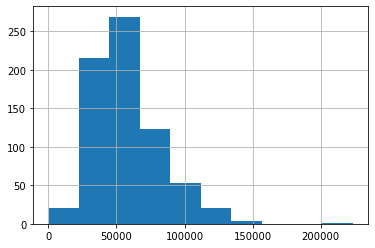

In [109]:
df_daily.hist()


In [110]:
#Total sales based on day
df_sales=data[['date', 'net_revenue']]
df_sales.columns=['date','sales']
df_sales.head()


,date,sales
1351860,2021-05-07,70.568867
216718,2021-05-07,0.791378
216710,2021-05-07,0.572899
216711,2021-05-07,0.572899
216712,2021-05-07,0.572899


In [111]:
# Daily Total Sales
daily_sales=df_sales.resample('D', on='date').sales.sum().to_frame()
daily_sales

,sales
date,
2019-06-01,27686.366016
2019-06-02,3511.559646
2019-06-03,7006.124367
2019-06-04,80530.520659
2019-06-05,86484.287754
...,...
2021-05-03,83381.216551
2021-05-04,86039.908417
2021-05-05,86122.130266


# Let's check if the dataset is stationary or non-stationary

In [112]:
X = daily_sales.values
split = len(X) // 2
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=44583.580665, mean2=70709.683391
variance1=408384324.542668, variance2=553246259.086531


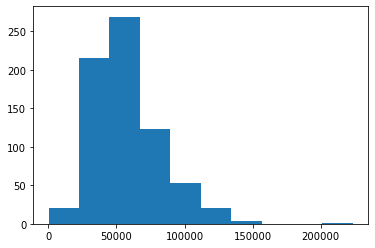

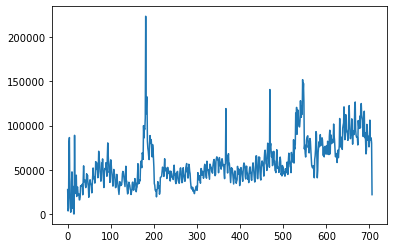

In [113]:
X=daily_sales.values

plt.hist(X)
plt.show()
plt.plot(X)
plt.show()

In [114]:
X=daily_sales.values
result=adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.211010
p-value: 0.019356
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


 It means the data is stationary because its p-value is less than 0.05. 

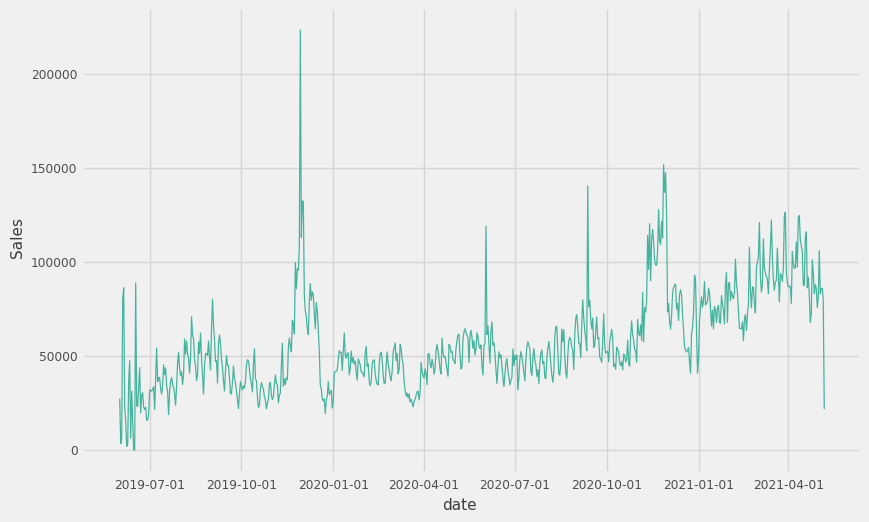

<ggplot: (8792034097689)>

In [115]:
import plotnine

import plotnine
p = (
    ggplot(daily_sales, aes(x='daily_sales.index', y='sales'))
    + geom_line(color='#45B39D') # line plot
    + labs(x='date', y='Sales')
    + plotnine.theme_538()
    + plotnine.theme(figure_size=(10, 6))
)
p

<AxesSubplot:xlabel='date'>

<Figure size 864x576 with 0 Axes>

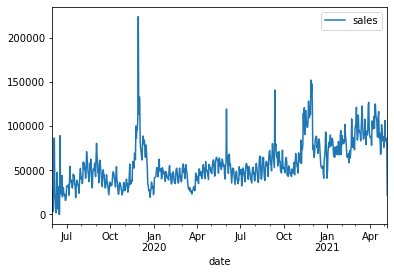

In [116]:
plt.figure(figsize=(12, 8))
daily_sales.plot()

<AxesSubplot:xlabel='date'>

<Figure size 864x576 with 0 Axes>

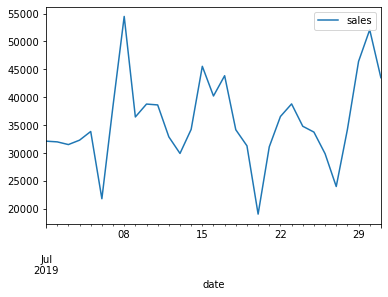

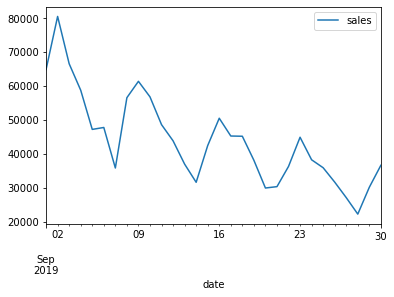

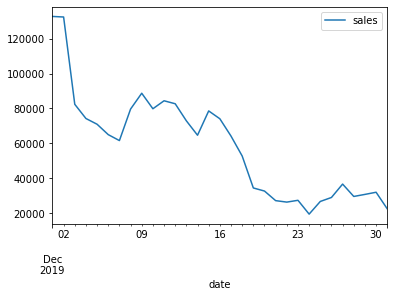

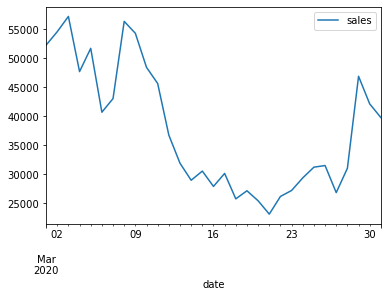

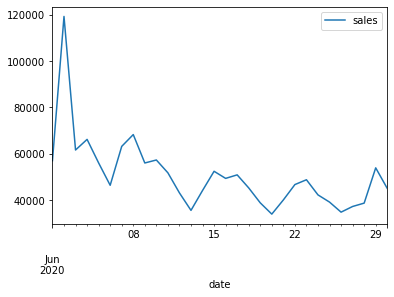

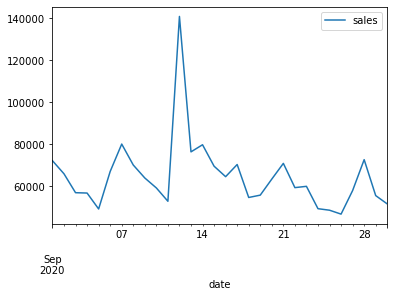

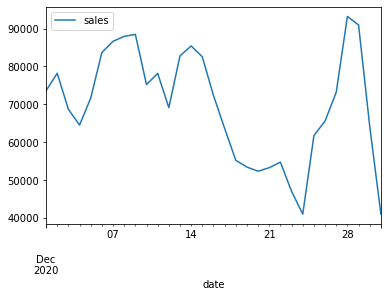

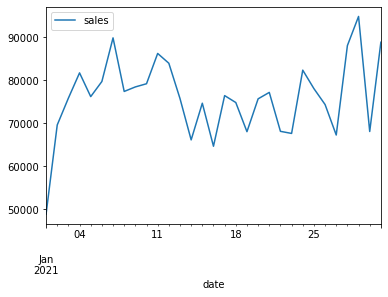

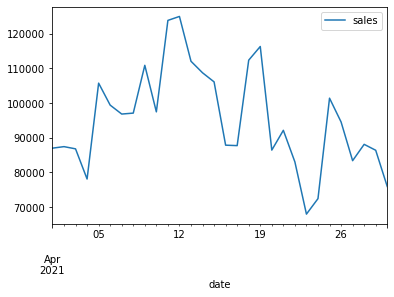

In [117]:
fig=plt.figure(figsize=(12, 8))
daily_sales[((daily_sales.index.year==2019) & (daily_sales.index.month==7))].plot()
daily_sales[((daily_sales.index.year==2019) & (daily_sales.index.month==9))].plot()
daily_sales[((daily_sales.index.year==2019) & (daily_sales.index.month==12))].plot()
daily_sales[((daily_sales.index.year==2020) & (daily_sales.index.month==3))].plot()
daily_sales[((daily_sales.index.year==2020) & (daily_sales.index.month==6))].plot()
daily_sales[((daily_sales.index.year==2020) & (daily_sales.index.month==9))].plot()
daily_sales[((daily_sales.index.year==2020) & (daily_sales.index.month==12))].plot()
daily_sales[((daily_sales.index.year==2021) & (daily_sales.index.month==1))].plot()
daily_sales[((daily_sales.index.year==2021) & (daily_sales.index.month==4))].plot()


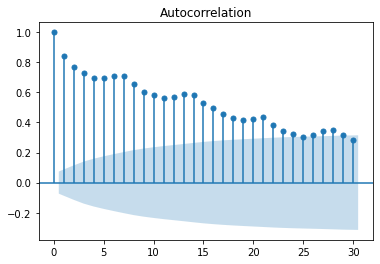

In [118]:
sm.graphics.tsa.plot_acf(daily_sales['sales'], lags=30)
plt.show()

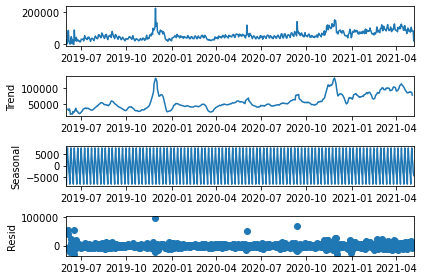

In [119]:

result = seasonal_decompose(daily_sales, model='additive')
result.plot()
plt.show()

In [120]:
# Featuring
from tsextract.feature_extraction.extract import build_features, build_features_forecast
from tsextract.domain.statistics import mean, median, std

features_request = {
    "window": [30],
    "window_statistic": [30, mean], 
    "difference_statistic": [30, 1, std], 
    "momentum_statistic": [30, 1, mean],
    "force_statistic": [30, 1, median]
}

#source: https://pypi.org/project/tsextract/

In [121]:
df=build_features(daily_sales.sales, features_request, target_lag=7, include_tzero=True)
df.head()

,T-30,T-29,T-28,T-27,T-26,T-25,T-24,T-23,T-22,T-21,...,T-4,T-3,T-2,T-1,window_statistic_30_mean,difference_statistic_30_1_std,momentum_statistic_30_1_mean,force_statistic_30_1_median,tzero,Target_Tplus7
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,27686.366016,3511.559646,7006.124367,80530.520659,86484.287754,23337.229031,15453.449009,2042.718493,3520.393234,36817.735858,...,22881.846834,16024.967234,16151.828680,19516.420649,26713.787433,30525.382893,1267.758534,1204.069956,32106.611780,54496.679436
2019-07-02,3511.559646,7006.124367,80530.520659,86484.287754,23337.229031,15453.449009,2042.718493,3520.393234,36817.735858,47678.421052,...,16024.967234,16151.828680,19516.420649,32106.611780,26861.128958,30522.272746,-124.881248,126.861446,31979.620299,36452.503431
2019-07-03,7006.124367,80530.520659,86484.287754,23337.229031,15453.449009,2042.718493,3520.393234,36817.735858,47678.421052,6473.885091,...,16151.828680,19516.420649,32106.611780,31979.620299,27810.064313,27259.706723,-2552.021361,-91.832202,31495.397121,38767.122681
2019-07-04,80530.520659,86484.287754,23337.229031,15453.449009,2042.718493,3520.393234,36817.735858,47678.421052,6473.885091,31454.648901,...,19516.420649,32106.611780,31979.620299,31495.397121,28626.373405,27226.034041,-178.064586,-91.832202,32285.291215,38611.060088
2019-07-05,86484.287754,23337.229031,15453.449009,2042.718493,3520.393234,36817.735858,47678.421052,6473.885091,31454.648901,15893.319183,...,32106.611780,31979.620299,31495.397121,32285.291215,27018.199090,24641.439601,2231.215583,126.861446,33843.484391,32879.940123


In [122]:
df.isnull().sum()

T-30                             0
T-29                             0
T-28                             0
T-27                             0
T-26                             0
T-25                             0
T-24                             0
T-23                             0
T-22                             0
T-21                             0
T-20                             0
T-19                             0
T-18                             0
T-17                             0
T-16                             0
T-15                             0
T-14                             0
T-13                             0
T-12                             0
T-11                             0
T-10                             0
T-9                              0
T-8                              0
T-7                              0
T-6                              0
T-5                              0
T-4                              0
T-3                              0
T-2                 

In [123]:
print(df.shape)
print(daily_sales.shape)

(670, 36)
(707, 1)


In [124]:
# Applying standard scaler on my data
feature_scaling=StandardScaler().fit(df[df.columns.values[:-1]])
scaled_features=feature_scaling.transform(df[df.columns[:-1]])

label_scaling=StandardScaler().fit(np.array(df[df.columns.values[-1]]).reshape(-1, 1))
scaled_label=label_scaling.transform(np.array(df[df.columns.values[-1]]).reshape(-1, 1))


In [125]:
# splitting data into train and test
training_size=int(scaled_features[:, :-1].shape[0] * 0.75)

X_train, y_train=scaled_features[:training_size, :-1], scaled_label[:training_size, :]
X_test, y_test=scaled_features[training_size:, :-1], scaled_label[training_size:, :]

In [126]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(502, 34)
(502, 1)
(168, 34)
(168, 1)


In [127]:
# Model Training

model=Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

history=model.fit(x=X_train, y=y_train, batch_size=32, epochs=100, verbose=1)

Epoch 1/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5943
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4868
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4321
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4774
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3251
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3198
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3241
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4032
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3588
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3138
Epoch 11/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3241
Epoch 12/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3604
Epoch 13/100
16/16 [=================

In [128]:
# Model Evaluation
eval=model.evaluate(x=X_test, y=y_test, verbose=1)
y_pred=model.predict(X_test)

6/6 [==============================] - 0s 1ms/step - loss: 1.5496


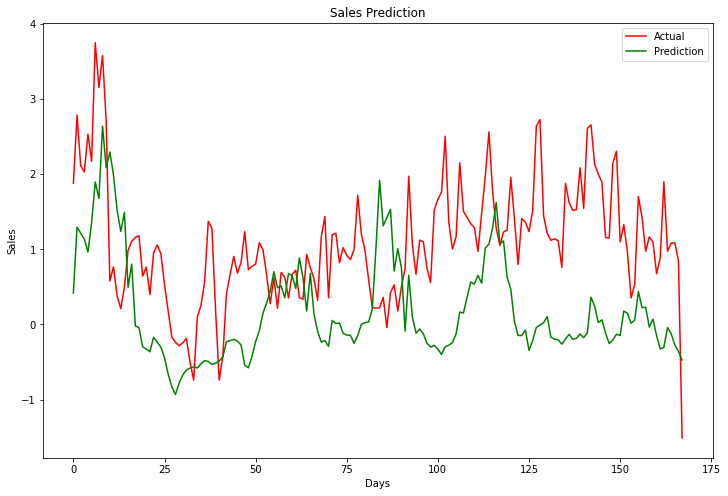

In [129]:
# comparing the prediction with actual
plt.figure(figsize=(12, 8))
plt.plot(y_test.reshape(-1, ), color='red', label='Actual')
plt.plot(y_pred.reshape(-1, ), color='green', label='Prediction')
plt.title('Sales Prediction')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.legend()
plt.show()

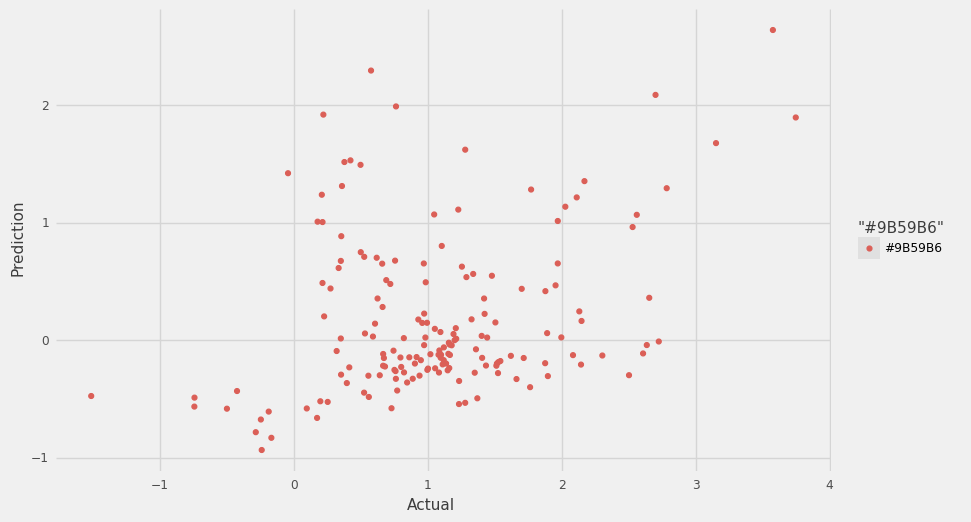

In [130]:
scatter(y_test.reshape(-1, ), y_pred.reshape(-1))

In [135]:
# Forecasting
forecast=build_features_forecast(daily_sales.sales, features_request, include_tzero=True)
scaled_features_forecast=feature_scaling.transform(forecast.tail(7))
pred=model.predict(scaled_features_forecast[: , :-1])

pred=scaled_label.inverse_transform(pred)


AttributeError: 'numpy.ndarray' object has no attribute 'inverse_transform'

In [ ]:
#range for the next 7 days
range=pd.date_range(start=df.index[-1]+timedelta(days=1), end=df.index[-1]+timedelta(days=7))
range.freq=None
range=range.to_list()



In [ ]:
#Daily sales prediction for 7 days
pred

In [ ]:
# Checking the accuracy of the model
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, y_pred)
print('MSE: %f' % mse)

In [ ]:
from numpy import sqrt
mse=mean_squared_error(y_test, y_pred)
rmse=sqrt(mse)
print('RMSE: %f' % rmse)